In [1]:
import os
import shutil
import pandas as pd

# Define paths
folder1 = "./HAM10000/HAM10000_images_part_1"  # Replace with the path to Folder 1
folder2 = "./HAM10000/HAM10000_images_part_2"  # Replace with the path to Folder 2
metadata_path = "./HAM10000/HAM10000_metadata.csv"  # Path to metadata CSV
output_base_path = "./HAM10000/organized_dataset"  # Path to save the processed dataset

# Step 1: Merge Images from Two Folders
combined_folder = os.path.join(output_base_path, "all_images")
os.makedirs(combined_folder, exist_ok=True)

print("Combining images from Folder 1 and Folder 2...")
for folder in [folder1, folder2]:
    for file in os.listdir(folder):
        src = os.path.join(folder, file)
        dst = os.path.join(combined_folder, file)
        shutil.copy(src, dst)

print(f"All images combined into: {combined_folder}")

# Step 2: Load Metadata and Map Images to Labels
print("Loading metadata...")
metadata = pd.read_csv(metadata_path)

# Check metadata columns
print("Metadata Columns:", metadata.columns)

# Extract relevant columns: image_id and dx (diagnosis)
image_labels = metadata[['image_id', 'dx']]

# Step 3: Create Folders for Each Class
class_names = image_labels['dx'].unique()
for class_name in class_names:
    class_folder = os.path.join(output_base_path, class_name)
    os.makedirs(class_folder, exist_ok=True)
print(f"Created folders for classes: {class_names}")

# Step 4: Organize Images into Class-Specific Folders
print("Organizing images into class-specific folders...")
for _, row in image_labels.iterrows():
    image_id = row['image_id']
    label = row['dx']
    
    # Image filename
    image_filename = f"{image_id}.jpg"  # Images in HAM10000 have a '.jpg' extension
    
    # Source and destination paths
    src_path = os.path.join(combined_folder, image_filename)
    dst_path = os.path.join(output_base_path, label, image_filename)
    
    # Check if image exists before moving
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)
    else:
        print(f"Warning: {src_path} not found.")

print("Preprocessing complete. Images are organized by diagnosis class.")

Combining images from Folder 1 and Folder 2...
All images combined into: ./HAM10000/organized_dataset/all_images
Loading metadata...
Metadata Columns: Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')
Created folders for classes: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
Organizing images into class-specific folders...
Preprocessing complete. Images are organized by diagnosis class.


In [ ]:
# Mapping of HAM10000 categories to umbrella labels
ham10000_label_mapping = {
    'akiec': 'Highly dangerous',       # Actinic keratosis / intraepithelial carcinoma
    'bcc': 'Moderately dangerous',     # Basal cell carcinoma
    'bkl': 'Benign',                   # Benign keratosis-like lesions
    'df': 'Benign',                    # Dermatofibroma
    'mel': 'Highly dangerous',         # Melanoma
    'nv': 'Benign',                    # Melanocytic nevus
    'vasc': 'Benign'                   # Vascular lesions
}

# Example Usage
# Original HAM10000 labels
ham10000_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Mapping labels to umbrella categories
umbrella_labels = [ham10000_label_mapping[label] for label in ham10000_labels]

# Print mapping
for original, mapped in zip(ham10000_labels, umbrella_labels):
    print(f"{original} -> {mapped}")

In [2]:
import os
import shutil

# Path to your dataset folder
original_dataset_path = './HAM10000/organized_dataset'
new_dataset_path = './HAM10000/organized_dataset_with_new_labels'

# Mapping of HAM10000 categories to umbrella labels
label_mapping = {
    'akiec': 'Highly dangerous',       # Actinic keratosis / intraepithelial carcinoma
    'bcc': 'Moderately dangerous',     # Basal cell carcinoma
    'bkl': 'Benign',                   # Benign keratosis-like lesions
    'df': 'Benign',                    # Dermatofibroma
    'mel': 'Highly dangerous',         # Melanoma
    'nv': 'Benign',                    # Melanocytic nevus
    'vasc': 'Benign'                   # Vascular lesions
}

# Create new folders for the umbrella labels
os.makedirs(new_dataset_path, exist_ok=True)
for umbrella_label in set(label_mapping.values()):
    os.makedirs(os.path.join(new_dataset_path, umbrella_label), exist_ok=True)

# Process the files
for original_label in os.listdir(original_dataset_path):
    original_label_path = os.path.join(original_dataset_path, original_label)
    
    # Skip if not a folder
    if not os.path.isdir(original_label_path):
        continue
    
    # Get the umbrella label for the current original label
    umbrella_label = label_mapping.get(original_label)
    if umbrella_label is None:
        print(f"Warning: No mapping for label '{original_label}', skipping.")
        continue
    
    # Destination path for the umbrella label
    umbrella_label_path = os.path.join(new_dataset_path, umbrella_label)
    
    # Move or copy files to the new folder structure
    for file_name in os.listdir(original_label_path):
        source_file = os.path.join(original_label_path, file_name)
        destination_file = os.path.join(umbrella_label_path, file_name)
        shutil.copy(source_file, destination_file)  # Use `shutil.move` to move instead of copy

print("Dataset reorganization complete!")

Dataset reorganization complete!


In [7]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the dataset directory
dataset_dir = './HAM10000/organized_dataset_with_new_labels_balanced'
output_dir = './HAM10000//split_dataset-with-new-labels-balanced'  # Folder where we will store train, validation, and test splits

# Create directories for training, validation, and test splits
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'validation')
test_dir = os.path.join(output_dir, 'test')

# Ensure directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Loop through each subdirectory (class folder)
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    
    if os.path.isdir(label_dir):  # Process only directories
        for image_file in os.listdir(label_dir):
            # Append full image path and the corresponding label
            image_paths.append(os.path.join(label_dir, image_file))
            labels.append(label)

# Create a DataFrame with image paths and labels
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# First, split data into train and temp (80% train, 20% temp for validation + test)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Then, split temp into validation and test (50% each from 20% of the data, i.e., 10% each of total data)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Function to copy images to specified directories
def copy_images(dataframe, destination_dir):
    for _, row in dataframe.iterrows():
        label_dir = os.path.join(destination_dir, row['label'])
        os.makedirs(label_dir, exist_ok=True)  # Create label subdirectory if it doesn't exist
        shutil.copy(row['image_path'], label_dir)  # Copy image to the respective folder

# Copy images to train, validation, and test folders
print("Copying training images...")
copy_images(train_df, train_dir)
print("Copying validation images...")
copy_images(validation_df, validation_dir)
print("Copying test images...")
copy_images(test_df, test_dir)

print(f"Dataset splits are prepared in {output_dir}")

Copying training images...
Copying validation images...
Copying test images...
Dataset splits are prepared in ./HAM10000//split_dataset-with-new-labels-balanced


2024-12-16 20:35:19,991 - Initializing ImageDataGenerator with rescaling...
2024-12-16 20:35:19,992 - Loading data...


Found 21893 images belonging to 3 classes.
Found 3838 images belonging to 3 classes.
Found 3865 images belonging to 3 classes.


2024-12-16 20:35:20,431 - Found existing model at ./trained_model1234.h5. Loading it...
2024-12-16 20:35:20,626 - Evaluating model on clean test set...


121/121 [==============================] - 11s 91ms/step - loss: 0.1881 - accuracy: 0.9107


2024-12-16 20:35:32,061 - Test Loss: 0.1881, Test Accuracy: 0.9107
2024-12-16 20:35:32,062 - Generating confusion matrix for clean test images...


121/121 [==============================] - 5s 39ms/step


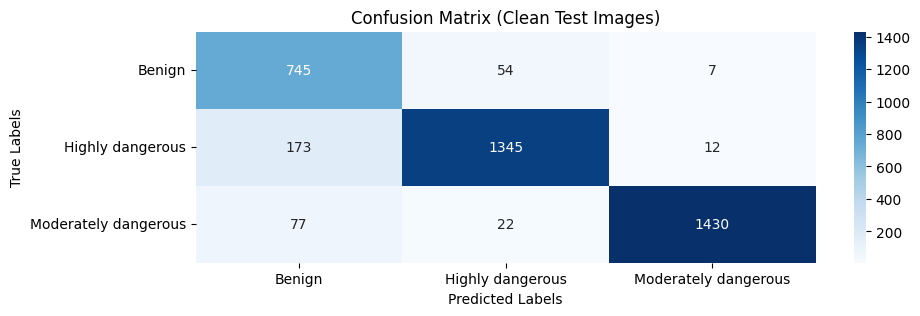

2024-12-16 20:35:47,670 - Generating adversarial examples using FGSM...


121/121 [==============================] - 5s 39ms/step


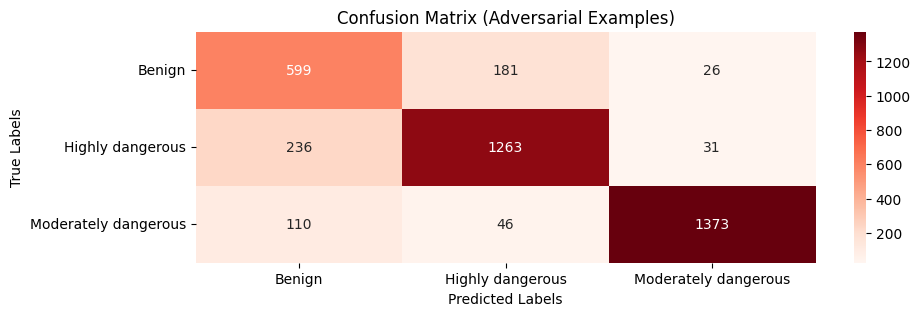

2024-12-16 20:41:45,006 - Applying randomized smoothing to images...


121/121 [==============================] - 5s 38ms/step


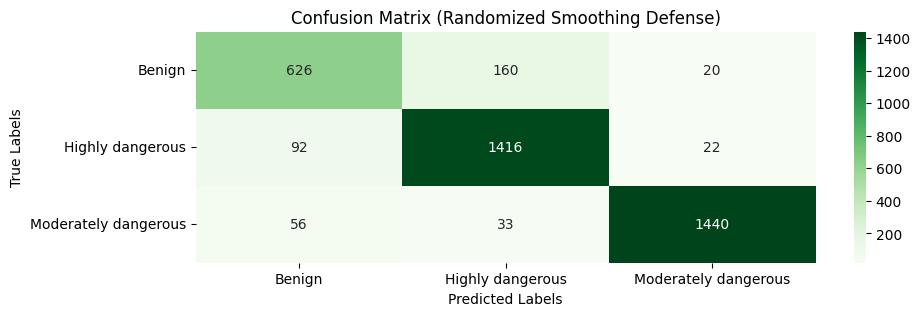

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

# Define the CNN model
def build_baseline_model(input_shape, num_classes):
    logger.info("Building the CNN model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    logger.info("Model successfully compiled with Adam optimizer and categorical crossentropy loss.")
    return model

# Define directories for training, validation, and test data
train_data_dir = './HAM10000//split_dataset-with-new-labels-balanced/train'
validation_data_dir = './HAM10000//split_dataset-with-new-labels-balanced/validation'
test_data_dir = './HAM10000//split_dataset-with-new-labels-balanced/test'

# Initialize ImageDataGenerator
logger.info("Initializing ImageDataGenerator with rescaling...")
datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
logger.info("Loading data...")
train_generator = datagen.flow_from_directory(
    train_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
validation_generator = datagen.flow_from_directory(
    validation_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    test_data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', shuffle=False
)

# Get input shape and number of classes
input_shape = (128, 128, 3)
num_classes = len(train_generator.class_indices)

# Check if a saved model exists
model_path = './trained_model1234.h5'
if os.path.exists(model_path):
    logger.info(f"Found existing model at {model_path}. Loading it...")
    model = load_model(model_path)
else:
    model = build_baseline_model(input_shape, num_classes)
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=3
    )
    model.save(model_path)

# Evaluate the model on clean test data
logger.info("Evaluating model on clean test set...")
test_loss, test_accuracy = model.evaluate(test_generator)
logger.info(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix for clean test data
logger.info("Generating confusion matrix for clean test images...")
test_images, test_labels = [], []

for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
class_labels = list(test_generator.class_indices.keys())

clean_conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 3))
sns.heatmap(clean_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Clean Test Images)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# FGSM Attack
def generate_fgsm_examples(model, images, labels, epsilon=0.01):
    logger.info("Generating adversarial examples using FGSM...")
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels)

    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        loss = tf.keras.losses.categorical_crossentropy(labels, predictions)

    gradients = tape.gradient(loss, images)
    perturbations = epsilon * tf.sign(gradients)
    adversarial_images = tf.clip_by_value(images + perturbations, 0, 1)
    return adversarial_images

adversarial_images = generate_fgsm_examples(model, test_images, test_labels)
adv_predictions = model.predict(adversarial_images)
adv_predicted_classes = np.argmax(adv_predictions, axis=1)

adv_conf_matrix = confusion_matrix(true_classes, adv_predicted_classes)
plt.figure(figsize=(10, 3))
sns.heatmap(adv_conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Adversarial Examples)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Randomized Smoothing Defense
def apply_randomized_smoothing(images, noise_std=0.1):
    logger.info("Applying randomized smoothing to images...")
    noise = tf.random.normal(shape=images.shape, mean=0.0, stddev=noise_std, dtype=tf.float32)
    smoothed_images = tf.clip_by_value(images + noise, 0, 1)
    return smoothed_images

smoothed_images = apply_randomized_smoothing(test_images)
smooth_predictions = model.predict(smoothed_images)
smooth_predicted_classes = np.argmax(smooth_predictions, axis=1)

smooth_conf_matrix = confusion_matrix(true_classes, smooth_predicted_classes)
plt.figure(figsize=(10, 3))
sns.heatmap(smooth_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Randomized Smoothing Defense)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()